In [2]:
"""K-means"""
'단점: 속성의 개수가 너무 많을 경우 정확도가 떨어지므로 PCA로 차원 감소해야 함 / 몇 개의 군집이 적절할지 선택 문제'

'단점'

In [3]:
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                            precompute_distances='auto', verbose=0, random_state=None,
                            copy_x=True, n_jobs=1, algorithm='auto')

'ㅇㄴㅁ'

In [5]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns= ['sepal_length','sepal_width', 'petal_length','petal_width'])
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [15]:
print(kmeans.labels_) #레코드별 분류된 군집 번호

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [16]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
iris_result
#실제 0인 타겟은 1군집, 1인 타겟은 0군집에 대다수와 2군집에 2개, ...

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [29]:
#군집화를 시각화. 2차원 평면에서 나타내기 위해 PCA로 2개 속성으로.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x']= pca_transformed[:,0]
irisDF['pca_y']= pca_transformed[:,1]
irisDF.head(4)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299


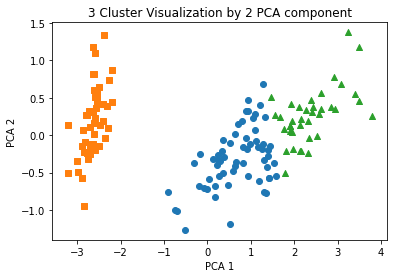

In [40]:
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index  
marker2_ind = irisDF[irisDF['cluster']==2].index 

plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o') #인덱스 선택하려면 loc이나 lioc
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Cluster Visualization by 2 PCA component')
plt.show()

In [45]:
#군집화 테스트를 위한 랜덤 데이터 생성 - make_blobs()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0) #center : 군집 개수 == y타겟 종류
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique, counts) #타겟별 개수 함께 출력

(200, 2) (200,)
[0 1 2] [67 67 66]


In [48]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


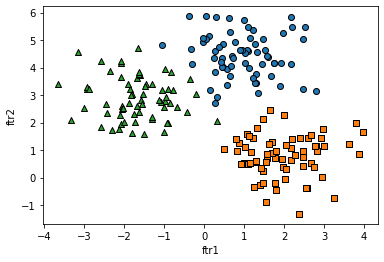

In [79]:
#원본 타겟의 분포도
target_list = np.unique(y)
markers=['o','s','^','P','D','H','x']

for target in target_list: #0,1,2
    each_cluster = clusterDF[clusterDF.target == target]
    plt.scatter(x=each_cluster['ftr1'], y=each_cluster['ftr2'], edgecolor='k', marker=markers[target]) #x, y는 각각 X피처

plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.show()

C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


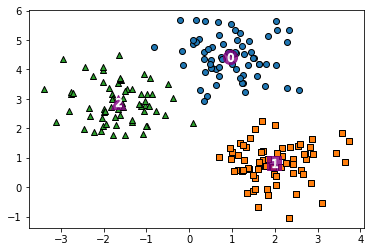

In [168]:
#k-means 군집화 분포 (위와 같은 데이터)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

centers = kmeans.cluster_centers_ #각 클러스터 중심 위치 좌표
unique_labels = np.unique(cluster_labels) #0,1,2
markers = ['o','s','^','P','D','H','x']

for label in unique_labels: #0,1,2
    each_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    
    plt.scatter(x=each_cluster['ftr1'], y=each_cluster['ftr2'], edgecolor='k', marker= markers[label])
    #군집 중심 표시
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='purple',alpha=0.8, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='w', marker= '$%d$' % label)
plt.show() #위와 마커가 다른이유는 kmeans_label컬럼은 무작위 군집 번호이기 때문

In [90]:
#clusterDF.groupby(['target','kmeans_label']).value_counts() #전체를 출력하고 카운트하면 ftr컬럼들은 묶이지 않아서 모든 레코드가 유니크하므로
clusterDF.groupby(['target'])['kmeans_label'].value_counts()#이렇게 해도 kmenas_label 데이터 종류별로 카운트해줌

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64

In [91]:
"""군집 평가"""
#대부분의 군집화를 해야할 데이터는 원본에 타깃 데이터를 주지 않기 때문에 군집화 후 위 처럼 비교할 대상이 없음

'군집 평가'

In [92]:
"""실루엣 분석
442p) 실루엣 계수는 -1 ~ 1 값 가짐 
1에 가까울수록 근처의 군집과 멀리 떨어짐, 0에 가까울 수록 근처 군집과 가깝다. -라면 아예 다른 군집에 데이터가 할당됨"""

'실루엣 분석'

In [110]:
"""
sklearn.metrics.silhouette_samples: 각 데이터 포인트의 실루엣 계수
sklearn.metrics.silhouette_score : 전체 데이터의 실루에 계수 평균 == np.mean(silhouette_sample())
하지만 score가 높아도, 개별 군집의 평균값이 서로 비슷하지 않고 치우친다면 좋은 군집화는 X"""

'\nsklearn.metrics.silhouette_samples: 각 데이터 포인트의 실루엣 계수\nsklearn.metrics.silhouette_score : 전체 데이터의 실루에 계수 평균 == np.mean(silhouette_sample())\n하지만 score가 높아도, 개별 군집의 평균값이 서로 비슷하지 않고 치우친다면 좋은 군집화는 X'

In [6]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#실루엣 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_
##fit 후에 .labels_ == fit_predict(X) == fit(X).prdict(X) == 예측 타깃값. 셋 다 같은 듯??

#실루엣 계수
score_samples = silhouette_samples(irisDF.iloc[:,0:4], irisDF['cluster']) # X피처와 예측한 타깃값만 넣어주면 
print('실루엣 샘플즈.shape:', score_samples.shape)

irisDF['silhouette_coeff'] = score_samples 

average_score = silhouette_score(iris.data, irisDF['cluster'])
print('실루엣 스코어: {0:.3f}'.format(average_score))
irisDF.head(3)
#head(3)을 보면 포인트 별 실루엣계수가 0.8을 넘지만 전체 평균은 0.553이 나옴. 각 군집별 실루엣 계수 평균을 확인해보자

실루엣 샘플즈.shape: (150,)
실루엣 스코어: 0.553


C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [127]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()
#군집별 실루엣 계수 평균의 편차가 큼 --> 좋지 못한 군집화. 군집 개수가 최적이 아닐 것

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [148]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성 - 퍼 옴
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmea

'군집 3개인 시각화 자료를 보면 1번군집이 가장 높은 수치인데, 위로 올라가 iris데이터 scatter자료를 보면 \n다른 데이터와 동떨어져 있고 비교적 군집 내 밀집도 좋은(?) 주황색 네모 군집임'

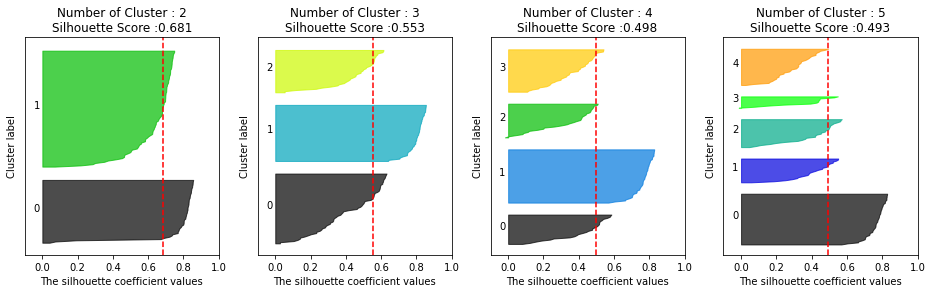

In [140]:
#군집 개수 최적화 시각화 함수 사용 - iris데이터로
'x축이 군집별 실루엣 계수. y축은 개별 데이터들이며 이를 연속적으로 나타낸것. y축이 넓다면 데이터가 많은 군집.점선은 전체 계수의 평균'
X = irisDF.iloc[:, 0:4]
visualize_silhouette([2,3,4,5], X)
"""군집 3개인 시각화 자료를 보면 1번군집이 가장 높은 수치인데, 위로 올라가 iris데이터 scatter자료를 보면 
다른 데이터와 동떨어져 있고 비교적 군집 내 밀집도 좋은(?) 주황색 네모 군집임"""
#군집 2개가 가장 좋음

In [141]:
"""평균 이동 (Mean Shift) <- KDE(kernel density estimation)을 이용. 확률 밀도 함수를 추정하는 방법
군집의 개수를 미리 설정하지 않고 대신 bandwidth를 설정해줘야 함 / 이상치의 영향이 적음"""
#특정 반경 내에 밀집이 높은 방향으로 주변의 개별 데이터들을 실제로 이동시키며 결국 모인 중심점을 군집 중심점으로 설정 

'평균 이동 (Mean Shift) <- KDE(kernel density estimation)을 이용'

In [7]:
#샘플 데이터 생성
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std =0.7, random_state=0)

#bandwidth는 군집을 어느 정도로 묶을지임. 커질수록 크고 완만하게 묶여서 군집이 1개가 됨. 451p
meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X) #비지도 학습이므로 fit(X).
print('cluster labels 유형:', np.unique(cluster_labels))
#군집이 너무 많지?

cluster labels 유형: [0 1 2 3 4 5]


In [8]:
meanshift = MeanShift(bandwidth=1.0)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [9]:
#최적의 bandwidth를 찾아누는 함수
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(X)
bandwidth

1.8158484154517098

In [10]:
#최적의 bandwidth로 평균이동 군집화
clusterDF = pd.DataFrame(data = X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X) #== .fit(X).predict(X) == .fit(X).labels_
print('cluster 유형:', np.unique(cluster_labels))

cluster 유형: [0 1 2]


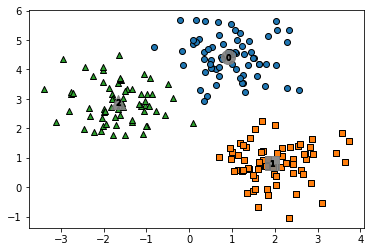

In [11]:
#3개 군집으로 시각화
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels #예측한 타깃값
centers = meanshift.cluster_centers_ #군집별 센터 좌표
unique_labels = np.unique(cluster_labels)
markers =['o','s','^','x','*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label'] == label]
    center_x_y = centers[label]
    
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    #군집 중심 표시
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker= markers[label]) #알파는 불투명도
    plt.scatter(x=center_x_y[0], y=center_x_y[1], edgecolor='k', color='k', marker='$%d$' % label) 
plt.show()

In [2]:
#원본 target값과 예측한 label 비교
clusterDF.groupby('target')['meanshift_label'].value_counts()
#1대1로 완벽 매칭!

NameError: name 'clusterDF' is not defined

In [177]:
"""GMM"""
"""kmeans와 달리 GMM은 중심점에서 원 형태의 거리기반이 아님 -> 데이터가 사선으로 겹쳐있는 경우 kmeans는 분류를 잘 못하지만 확률
기반의 GMM은 잘 분류"""

'kmeans와 달리 GMM은 중심점에서 원 형태의 거리기반이 아님 -> 데이터가 사선으로 겹쳐있는 경우 kmeans는 분류를 잘 못하지만 확률\n기반의 GMM은 잘 분류'

In [52]:
#시각화 함수 만들어놓기
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscluster=True):
    if iscluster:
        centers =clusterobj.cluster_centers_
        markers = ['o','s','^','x','*']
        y = dataframe[label_name]
        labels = np.unique(y)
        for label in labels: #0,1,2,,,

            each_cluster = dataframe[dataframe[label_name]==label]
            center_x_y = centers[label]
            plt.scatter(x= each_cluster['ftr1'], y= each_cluster['ftr2'], edgecolor='k', marker = markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker= markers[label]) 
            plt.scatter(x=center_x_y[0], y=center_x_y[1], edgecolor='k', color='k', marker='$%d$' % label) 
            #plt.show()
    else:
        markers = ['o','s','^','x','*']
        y = dataframe[label_name]
        labels = np.unique(y)
        for label in labels: #0,1,2,,,
            each_cluster = dataframe[dataframe[label_name]==label]
            plt.scatter(x= each_cluster['ftr1'], y= each_cluster['ftr2'], edgecolor='k', marker = markers[label])
        plt.show() #for 문이 끝나고 show를 해야 한 그림에 한꺼번에 그려짐

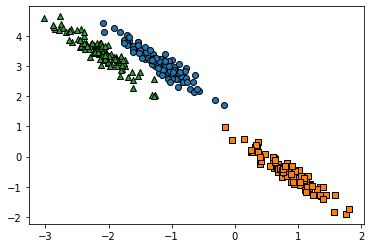

In [41]:
#KMEANS와 GMM의 구분을 위한 데이터셋 생성
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)
#길게 늘어난 직선과 유사한 타원형태를 만들기위해 변환
transformation = [[0.60834549,-0.63667341],[-0.40887718,0.85253229]]
x_aniso = np.dot(X,transformation)

clusterDF= pd.DataFrame(data=x_aniso, columns=['ftr1','ftr2'])
clusterDF['target']= y

visualize_cluster_plot(None, clusterDF, 'target', iscluster=False)

C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


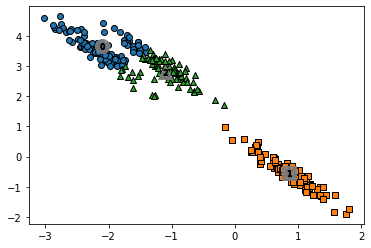

In [46]:
#kmeans 로 먼저 위의 사선방향 타원분포 데이터 군집화
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(x_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscluster=True)
#분류 제대로 못해냄

C:\Users\000hj\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


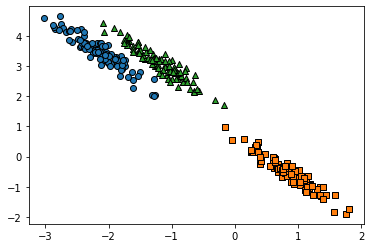

In [56]:
#GMM으로
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(x_aniso).predict(x_aniso)
clusterDF['gmm_label'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscluster=False) #GMM은 cluster_centers_ 속성이 없으므로 Flase로.
#kmeans에 비해 아주 잘 분리됨

In [62]:
#kmeans와 gmm의 군집화 상태
print("kmeans 군집")
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print("\n Gaussian,, 군집")
print(clusterDF.groupby('target')['gmm_label'].value_counts())

kmeans 군집
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

 Gaussian,, 군집
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


In [ ]:
"""DBSCAN 넘어감 density밀도 기반"""

In [81]:
#군집화 실습 (데이터 많이 줄였음)
#!pip install openpyxl
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel('Online_Retail_re.xlsx')
retail_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [83]:
retail_df.info() #CustomerID 에 널값이 많아  @@non-null로 나오지만 비어있어(..?)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    49999 non-null  object        
 1   StockCode    49999 non-null  object        
 2   Description  49857 non-null  object        
 3   Quantity     49999 non-null  int64         
 4   InvoiceDate  49999 non-null  datetime64[ns]
 5   UnitPrice    49999 non-null  float64       
 6   CustomerID   32118 non-null  float64       
 7   Country      49999 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.1+ MB


In [84]:
retail_df.isnull().sum()

InvoiceNo          0
StockCode          0
Description      142
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     17881
Country            0
dtype: int64

In [88]:
#CustomerID 널값제거 / Quantity, UnitPrice 음수값 제거
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(28448, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [89]:
#Country 컬럼의 종류별 수
retail_df['Country'].value_counts()[:5]

United Kingdom    28448
Name: Country, dtype: int64

In [92]:
#영국이 대다수 이므로 영국만 남기겠음
retail_df = retail_df[retail_df['Country']== 'United Kingdom']
retail_df.shape

(28448, 8)

In [93]:
#RFM (Recency, Frequency, Monetary) 기반 데이터 가공
 #두 컬럼을 합쳐 주문금액sale_amount 피처를 만들고/ CusrtomerNo도 편리한 식별성을 위해 float형을 int형으루 (why??)
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [100]:
#온라인 판매 데이터는 주문 횟수와 금액이 특정 고객(소매상)에게 압도적으로 많음
print(retail_df['CustomerID'].value_counts()[:5])
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False).head()) #print를 해야 두개 모두 출력됨

12748    682
17841    389
14606    324
17850    297
13081    243
Name: CustomerID, dtype: int64
CustomerID
18102    27834.61
15061    19950.66
16029    13202.52
17511    10573.22
13089     7738.67
Name: sale_amount, dtype: float64


In [108]:
#주문번호 + 상품코드 를 해주면 1에 거의 근접한 유일한 식별자가 됨
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()#컬럼을 지정하지 않으면 그룹컬럼을 제외한 모든 컬럼이나옴
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sale_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [129]:
#Recency, Frequency, Monetary 기반 고객 세그먼테이션은 주문기간, 주문횟수, 주문금액 데이터 기반,,,
 #groupby의 multiple연산을 위해 agg()이용
aggregations = {
    'InvoiceDate': 'max', #가장 최근
    'InvoiceNo': 'count',
    'sale_amount': 'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations) #집계함수 세종류를 컬럼별로 적용

cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                   'InvoiceNo':'Frequency',
                                   'sale_amount':'Monetary'}
                        )
cust_df= cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12747,2010-12-13 10:41:00,15,706.27
1,12748,2011-01-05 17:33:00,682,4479.43
2,12826,2010-12-09 15:21:00,9,155.00


In [130]:
cust_df['Recency'].dtype

dtype('<M8[ns]')

In [134]:
# 481p 이해X ---- 되는거야 안 되는거야
import datetime as dt

cust_df['Recency'] = dt.datetime(2011, 12, 10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1) #??
print('로우와 칼럼 건수는', cust_df.shape)

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

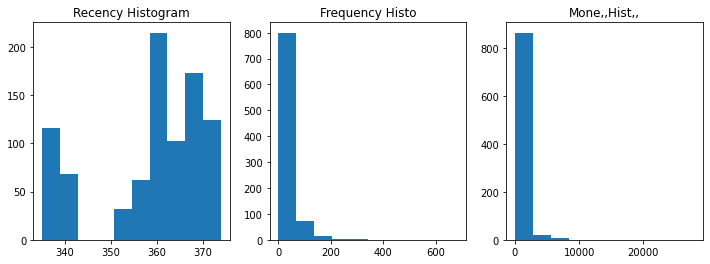

In [163]:
#소매업체의 대규모 구매로, 데이터는 왜곡. 왜곡된 데이터 히스토그램 확인
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])
         
ax2.set_title('Frequency Histo')
ax2.hist(cust_df['Frequency'])
         
ax3.set_title('Mone,,Hist,,')
ax3.hist(cust_df['Monetary'])
plt.show()
#그래프에 X값이 20000이 있다는건, 그 이상의 값이 있다는 걸 의미

In [141]:
cust_df[['Recency','Frequency', 'Monetary']].describe()#분포도

,Recency,Frequency,Monetary
count,893.000000,893.000000,893.000000
mean,358.992161,31.856663,666.138869
std,12.100057,42.486817,1500.839887
min,335.000000,1.000000,15.000000
25%,355.000000,10.000000,201.940000
50%,361.000000,19.000000,331.600000
75%,368.000000,39.000000,613.570000
max,374.000000,682.000000,27834.610000


In [145]:
#3개 컬럼에 StandardScaler 후 k-means (R /F / M 으로 군집화)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency', 'Frequency', 'Monetary']]#.values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label']= labels

print('실루엣 스코어는:{0:3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는:0.568805


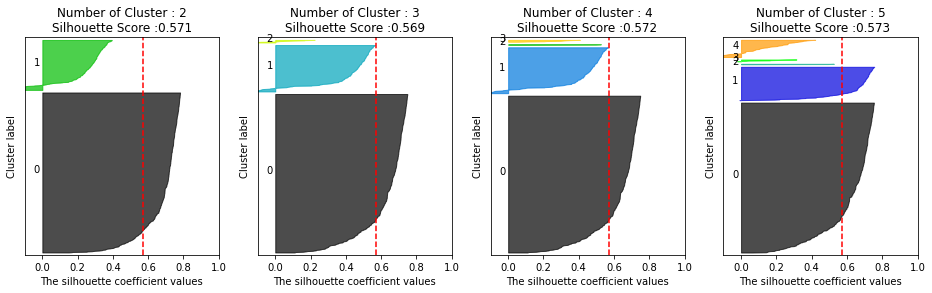

In [150]:
#군집개수 정하기 ....#484p부록에 군집 개수별 scatter시각화 코드
visualize_silhouette([2,3,4,5], X_features_scaled)
#3개 이상부터는 너무 작은 군집이 생겨남

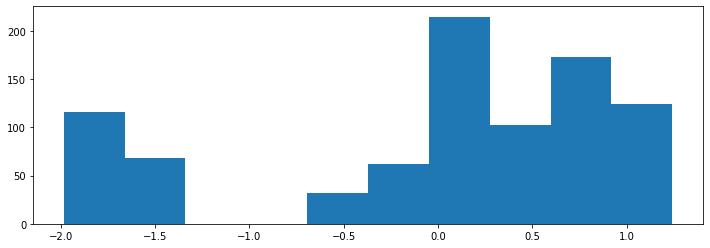

In [165]:
#여전히 왜곡정도가 심함 -> 로그 변환 후 k-means를 해보고 위와 비교